<a href="https://colab.research.google.com/github/alteregoxiv/stockpred/blob/main/stockpredictionlstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STOCK PREDICTION USING LSTM(KERAS)**


# **Importing necessary Libraries**

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **Training Data Set**

In [47]:
traindata = pd.read_csv("./AMZNtrain.csv")
traindata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


# **Testing Data Set**

In [48]:
testdata = pd.read_csv("./AMZNtest.csv")
testdata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,1465.199951,1553.359985,1460.930054,1539.130005,1539.130005,7983100
1,2019-01-03,1520.010010,1538.000000,1497.109985,1500.280029,1500.280029,6975600
2,2019-01-04,1530.000000,1594.000000,1518.310059,1575.390015,1575.390015,9182600
3,2019-01-07,1602.310059,1634.560059,1589.189941,1629.510010,1629.510010,7993200
4,2019-01-08,1664.689941,1676.609985,1616.609985,1656.579956,1656.579956,8881400


# **Shapes of both data sets(Train , Test)**

In [49]:
traindata.shape , testdata.shape

((1258, 7), (21, 7))

# **Concatenating Datasers and Sorting**

In [50]:
data = pd.concat([traindata , testdata] , axis=0 , ignore_index=True)
data.head

<bound method NDFrame.head of             Date         Open         High  ...        Close    Adj Close    Volume
0     2014-01-02   398.799988   399.359985  ...   397.970001   397.970001   2137800
1     2014-01-03   398.290009   402.709991  ...   396.440002   396.440002   2210200
2     2014-01-06   395.850006   397.000000  ...   393.630005   393.630005   3170600
3     2014-01-07   395.040009   398.470001  ...   398.029999   398.029999   1916000
4     2014-01-08   398.470001   403.000000  ...   401.920013   401.920013   2316500
...          ...          ...          ...  ...          ...          ...       ...
1274  2019-01-25  1670.500000  1683.479980  ...  1670.569946  1670.569946   4945900
1275  2019-01-28  1643.589966  1645.000000  ...  1637.890015  1637.890015   4837700
1276  2019-01-29  1631.270020  1632.380005  ...  1593.880005  1593.880005   4632800
1277  2019-01-30  1623.000000  1676.949951  ...  1670.430054  1670.430054   5783800
1278  2019-01-31  1692.849976  1736.410034  ..

In [51]:
# for i in range(len(data)):
#   date = data["Date"][i]
#   d = date.split("-")
#   s = str(d[0]) + str(d[1]) + str(d[2])
#   data["Date"][i] = s
# data.head()

In [52]:
data = data.sort_index(ascending=True , axis=0)
data.head

<bound method NDFrame.head of             Date         Open         High  ...        Close    Adj Close    Volume
0     2014-01-02   398.799988   399.359985  ...   397.970001   397.970001   2137800
1     2014-01-03   398.290009   402.709991  ...   396.440002   396.440002   2210200
2     2014-01-06   395.850006   397.000000  ...   393.630005   393.630005   3170600
3     2014-01-07   395.040009   398.470001  ...   398.029999   398.029999   1916000
4     2014-01-08   398.470001   403.000000  ...   401.920013   401.920013   2316500
...          ...          ...          ...  ...          ...          ...       ...
1274  2019-01-25  1670.500000  1683.479980  ...  1670.569946  1670.569946   4945900
1275  2019-01-28  1643.589966  1645.000000  ...  1637.890015  1637.890015   4837700
1276  2019-01-29  1631.270020  1632.380005  ...  1593.880005  1593.880005   4632800
1277  2019-01-30  1623.000000  1676.949951  ...  1670.430054  1670.430054   5783800
1278  2019-01-31  1692.849976  1736.410034  ..

# **Saving the DataFrame**

In [53]:
data.to_csv(r'./AMZNTotalData.csv' , index=False)

In [54]:
newdata = pd.read_csv("./AMZNTotalData.csv")
newdata.head

<bound method NDFrame.head of             Date         Open         High  ...        Close    Adj Close    Volume
0     2014-01-02   398.799988   399.359985  ...   397.970001   397.970001   2137800
1     2014-01-03   398.290009   402.709991  ...   396.440002   396.440002   2210200
2     2014-01-06   395.850006   397.000000  ...   393.630005   393.630005   3170600
3     2014-01-07   395.040009   398.470001  ...   398.029999   398.029999   1916000
4     2014-01-08   398.470001   403.000000  ...   401.920013   401.920013   2316500
...          ...          ...          ...  ...          ...          ...       ...
1274  2019-01-25  1670.500000  1683.479980  ...  1670.569946  1670.569946   4945900
1275  2019-01-28  1643.589966  1645.000000  ...  1637.890015  1637.890015   4837700
1276  2019-01-29  1631.270020  1632.380005  ...  1593.880005  1593.880005   4632800
1277  2019-01-30  1623.000000  1676.949951  ...  1670.430054  1670.430054   5783800
1278  2019-01-31  1692.849976  1736.410034  ..

# **Test Train Split from the concatenated Data Set**

In [55]:
# limit = np.random.rand((len(newdata)))<0.7
trainsize = int(len(newdata) * 0.8)
train = newdata[ : trainsize]
test = newdata[trainsize : ]
train.shape , test.shape

((1023, 7), (256, 7))

In [56]:
newtrain = train[['Adj Close']]
newtest = test[['Adj Close']]

newtrain.shape , newtest.shape

((1023, 1), (256, 1))

# **Scaling the Data**

In [57]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))

newtrain = sc.fit_transform(newtrain)
newtest = sc.fit_transform(newtest)

newtrain = np.reshape(newtrain , (-1 , 1))
newtest = np.reshape(newtest , (-1 , 1))

# **Preparing the Final data using timestep for LSTM**

In [58]:
def final_data(data , timestep):
  xdata , ydata = [] , []
  l = len(data)
  for i in range(l-timestep):
    a = data[i : i+timestep , 0]
    xdata.append(a)
    ydata.append(data[i+timestep , 0])
  return np.array(xdata) , np.array(ydata)



timestep = 100
xtrain  , ytrain = final_data(newtrain , timestep)
xtest , ytest = final_data(newtest , timestep)

In [59]:
xtrain = xtrain.reshape(xtrain.shape[0] , xtrain.shape[1] , 1)
xtest = xtest.reshape(xtest.shape[0] , xtest.shape[1] , 1)
#xtrain.shape
# print(xtrain)

# **Preparing Model**

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM

In [61]:
model = Sequential()
model.add(LSTM(50 , return_sequences=True , input_shape=(100 , 1)))
model.add(LSTM(50 , return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error' , optimizer='adam')

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


# **Fitting**

In [63]:
model.fit(xtrain , ytrain , validation_data=(xtest , ytest) , epochs=150 , batch_size=64 , verbose=1)

Epoch 1/150
15/15 [==============================] - 9s 259ms/step - loss: 0.0488 - val_loss: 0.0425
Epoch 2/150
15/15 [==============================] - 3s 183ms/step - loss: 0.0056 - val_loss: 0.0213
Epoch 3/150
15/15 [==============================] - 3s 182ms/step - loss: 0.0019 - val_loss: 0.0210
Epoch 4/150
15/15 [==============================] - 3s 180ms/step - loss: 0.0011 - val_loss: 0.0205
Epoch 5/150
15/15 [==============================] - 3s 180ms/step - loss: 9.8451e-04 - val_loss: 0.0208
Epoch 6/150
15/15 [==============================] - 3s 180ms/step - loss: 8.9446e-04 - val_loss: 0.0210
Epoch 7/150
15/15 [==============================] - 3s 179ms/step - loss: 8.6256e-04 - val_loss: 0.0206
Epoch 8/150
15/15 [==============================] - 3s 180ms/step - loss: 8.2510e-04 - val_loss: 0.0202
Epoch 9/150
15/15 [==============================] - 3s 180ms/step - loss: 8.0675e-04 - val_loss: 0.0205
Epoch 10/150
15/15 [==============================] - 3s 179ms/step - l

In [64]:
trainpredict = model.predict(xtrain)
testpredict = model.predict(xtest)

In [65]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [66]:
sqrt(mean_squared_error(ytrain , trainpredict))

0.013409216603825951

In [67]:
sqrt(mean_squared_error(ytest , testpredict))

0.06844911613199034

In [68]:
# x_train = sc.inverse_transform(xtrain)
y_train = sc.inverse_transform(np.reshape(ytrain , (-1 , 1)))

In [69]:
# x_test = sc.inverse_transform(xtest)
y_test = sc.inverse_transform(np.reshape(ytest , (-1 , 1)))

In [70]:
train_predict = sc.inverse_transform(trainpredict)
test_predict = sc.inverse_transform(testpredict)

In [71]:
sqrt(mean_squared_error(y_train , train_predict))

9.385244796639816

In [72]:
sqrt(mean_squared_error(y_test , test_predict))

47.90821791650324

# **Plotting**

Text(71.75, 0.5, 'Closing Value')

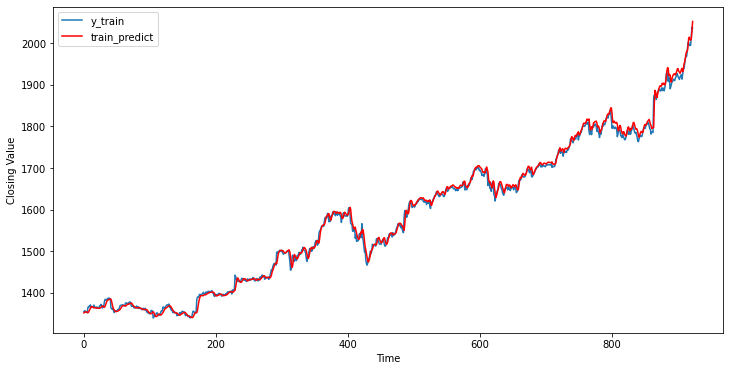

In [73]:
from google.colab import files

plt.figure(figsize=(12 , 6))

plt.plot(y_train , label='y_train')
plt.plot(train_predict , c='red' , label='train_predict')
plt.legend()
plt.savefig("trainprediction.png")

plt.xlabel("Time")
plt.ylabel("Closing Value")

# files.download("trainprediction.png")

Text(71.75, 0.5, 'Closing Value')

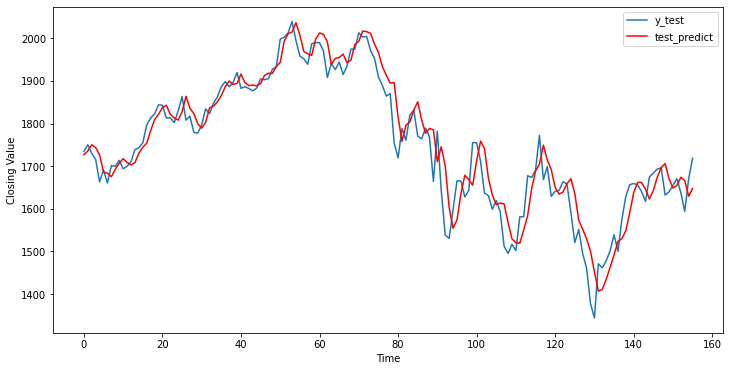

In [74]:
plt.figure(figsize=(12 , 6))

plt.plot(y_test , label='y_test')
plt.plot(test_predict , c='red' , label='test_predict')
plt.legend()
plt.savefig("testprediction.png")

plt.xlabel("Time")
plt.ylabel("Closing Value")

# files.download("testprediction.png")

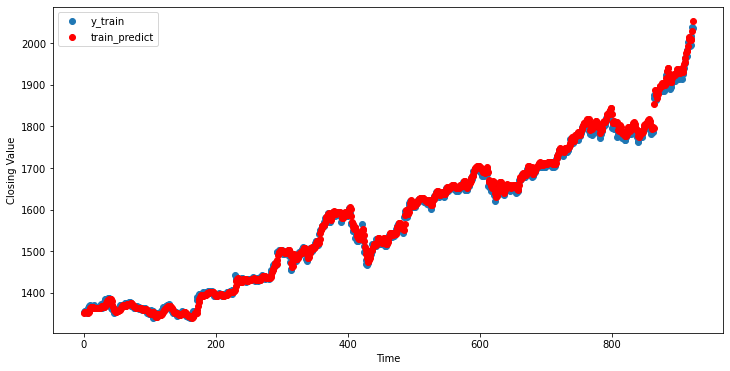

In [75]:
plt.figure(figsize=(12 , 6))

l = [i for i in range(y_train.shape[0])]
plt.scatter(l , y_train , label='y_train')
plt.scatter(l , train_predict , label='train_predict' , c='red')
plt.legend()

plt.xlabel("Time")
plt.ylabel("Closing Value")

plt.plot()

plt.savefig("scattertrainpredict.png")
# files.download("scattertrainpredict.png")

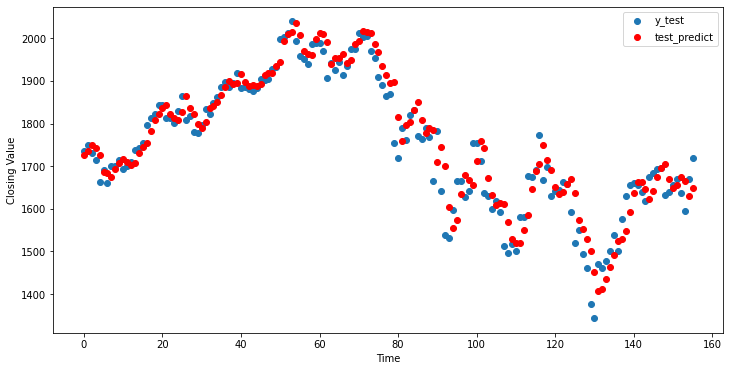

In [76]:
plt.figure(figsize=(12 , 6))

li = [i for i in range(y_test.shape[0])]
plt.scatter(li , y_test , label='y_test')
plt.scatter(li , test_predict , label='test_predict' , c='red')
plt.legend()

plt.xlabel("Time")
plt.ylabel("Closing Value")

plt.plot()

plt.savefig("scattertestpredict.png")
# files.download("scattertestpredict.png")

# **Predicting**

In [77]:
newpred = test[['Adj Close']]
newpred = np.reshape(newpred , (-1 , 1))
newpred = sc.fit_transform(newpred)
xnpred = []
for i in range(len(newpred) - 100 , len(newpred)):
  xnpred.append(newpred[i][0])

xnpred = np.reshape(xnpred , (1 , len(xnpred) , 1))
xnpred.shape
tpred = model.predict(xnpred)
tpred = sc.inverse_transform(tpred)
tpred.reshape(1)
print(tpred)

[[1702.1484]]


# **Saving & loading the model and predicting with the loaded model**

In [78]:
model.save("./lstmstockpredmodel")

INFO:tensorflow:Assets written to: ./lstmstockpredmodel/assets


INFO:tensorflow:Assets written to: ./lstmstockpredmodel/assets


In [79]:
from tensorflow import keras
pmodel = keras.models.load_model("./lstmstockpredmodel")
nxpred = pmodel.predict(xnpred)
nxpred = sc.inverse_transform(nxpred)
nxpred

array([[1702.1484]], dtype=float32)

In [80]:
newp = newdata[['Adj Close']]
newp = sc.fit_transform(newp)
newp = newp.flatten()

for i in range(2000):
  xnewp = []
  for j in range(len(newp) - 100 , len(newp)):
      xnewp.append(newp[j])

  xnewp = np.reshape(xnewp , (1 , len(xnewp) , 1))
  tnp = pmodel.predict(xnewp)
  tnp.reshape(1)
  newp = np.append(newp , tnp[0][0])
  tnp = sc.inverse_transform(tnp)
  print(tnp)

[[1750.6979]]
[[1782.8037]]
[[1806.049]]
[[1826.4774]]
[[1844.4917]]
[[1861.0933]]
[[1877.7096]]
[[1895.4911]]
[[1915.1257]]
[[1936.8622]]
[[1960.5967]]
[[1985.989]]
[[2012.5883]]
[[2039.9404]]
[[2067.668]]
[[2095.5134]]
[[2123.3425]]
[[2151.1323]]
[[2178.935]]
[[2206.8413]]
[[2234.946]]
[[2263.325]]
[[2292.0225]]
[[2321.045]]
[[2350.3708]]
[[2379.9536]]
[[2409.7356]]
[[2439.658]]
[[2469.663]]
[[2499.698]]
[[2529.717]]
[[2559.6797]]
[[2589.5469]]
[[2619.2822]]
[[2648.8462]]
[[2678.1997]]
[[2707.301]]
[[2736.108]]
[[2764.5771]]
[[2792.6675]]
[[2820.3394]]
[[2847.5542]]
[[2874.2783]]
[[2900.4795]]
[[2926.13]]
[[2951.204]]
[[2975.6812]]
[[2999.5427]]
[[3022.7727]]
[[3045.3599]]
[[3067.295]]
[[3088.5708]]
[[3109.1848]]
[[3129.1343]]
[[3148.4226]]
[[3167.0522]]
[[3185.029]]
[[3202.3599]]
[[3219.0544]]
[[3235.1226]]
[[3250.5767]]
[[3265.4282]]
[[3279.6917]]
[[3293.3813]]
[[3306.513]]
[[3319.1003]]
[[3331.1604]]
[[3342.7092]]
[[3353.762]]
[[3364.3362]]
[[3374.448]]
[[3384.1125]]
[[3393.3477]]

In [81]:
print(newdata)

            Date         Open         High  ...        Close    Adj Close    Volume
0     2014-01-02   398.799988   399.359985  ...   397.970001   397.970001   2137800
1     2014-01-03   398.290009   402.709991  ...   396.440002   396.440002   2210200
2     2014-01-06   395.850006   397.000000  ...   393.630005   393.630005   3170600
3     2014-01-07   395.040009   398.470001  ...   398.029999   398.029999   1916000
4     2014-01-08   398.470001   403.000000  ...   401.920013   401.920013   2316500
...          ...          ...          ...  ...          ...          ...       ...
1274  2019-01-25  1670.500000  1683.479980  ...  1670.569946  1670.569946   4945900
1275  2019-01-28  1643.589966  1645.000000  ...  1637.890015  1637.890015   4837700
1276  2019-01-29  1631.270020  1632.380005  ...  1593.880005  1593.880005   4632800
1277  2019-01-30  1623.000000  1676.949951  ...  1670.430054  1670.430054   5783800
1278  2019-01-31  1692.849976  1736.410034  ...  1718.729980  1718.729980  1

In [90]:
amzdate = newdata[['Date']]
amzclose = newdata[['Adj Close']]
amzdate = np.array(amzdate)
amzclose = np.array(amzclose)

In [98]:
import pickle

with open('amzdate.pkl' , 'wb') as f:
  pickle.dump(amzdate , f)

with open('amzdate.pkl' , 'rb') as f:
    ad = pickle.load(f)

print(ad)

[['2014-01-02']
 ['2014-01-03']
 ['2014-01-06']
 ...
 ['2019-01-29']
 ['2019-01-30']
 ['2019-01-31']]


In [97]:
with open('amzclose.pkl' , 'wb') as fi:
  pickle.dump(amzclose , fi)

with open('amzclose.pkl' , 'rb') as fi:
  ac = pickle.load(fi)

print(ac)

[[ 397.970001]
 [ 396.440002]
 [ 393.630005]
 ...
 [1593.880005]
 [1670.430054]
 [1718.72998 ]]
